In [ ]:
## Testing
print("hello")

hello


In [8]:
## Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load data
raw_df = pd.read_parquet("../data/raw/online_retail.parquet",engine="fastparquet")


In [ ]:
## Clean the raw data

In [ ]:
## Exploratory Data Analysis - DO NOT INCLUDE IN PIPELINE
raw_df.head() ## 500K rows, which are line items for invoices.
raw_df.describe() ## Negative quantity and price metrics, likely refunds. Should be removed.
(raw_df["Price"] < 0).sum() ## 3 line items are negative, so will remove these.
raw_df.info() ## There are about 100K line items that are null.
raw_df.isnull().sum() ## Nulls are all in customer ID feature.
raw_df.shape # Shape before cleaning.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  525461 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


(525461, 8)

In [ ]:
## Full dataset cleaning
full_df = raw_df[(raw_df["Price"] >= 0) & (raw_df["Quantity"] >= 0)].dropna(subset=["Customer ID"])
full_df.shape # Shape after cleaning. Looks like there were an additional 10K rows removed for negative price and quantity.

(407695, 8)

In [31]:
full_df.head(20)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [32]:
## Group into customer-level dataframe

## First create lineitem_amount column
full_df["lineitem_amount"] = full_df["Quantity"] * full_df["Price"]
full_df.head(20)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,lineitem_amount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom,39.60
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom,59.50
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom,30.60
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom,45.00


In [69]:
## Get max date within the entire dataset as reference for 'today'
MAX_DATE = full_df["InvoiceDate"].max().normalize()
print(MAX_DATE)

2010-12-09 00:00:00


In [76]:
## Check on results
full_df["Invoice"].str.startswith("C").describe() 
full_df["Invoice"].str.startswith("c").describe() ## According to this, no invoices were cancelled

count     407695
unique         1
top        False
freq      407695
Name: Invoice, dtype: object

In [87]:
## Create invoice df
invoice_df = (
    full_df
    .assign(InvoiceDate=full_df["InvoiceDate"].dt.normalize())
    .groupby(["Customer ID", "InvoiceDate"], as_index=False)
    .agg(
        monetary=("lineitem_amount", "sum")
        # Frequency=("Invoice", "nunique") # This captures multiple invoices for customer in same day, which we don't care about
    )
)


In [ ]:
## Sort by customer, then date to help get interpurchase days
invoice_df = invoice_df.sort_values(["Customer ID", "InvoiceDate"])
# invoice_df.head()

,Customer ID,Invoice,lineitem_amount,InvoiceDate
0,12346.0,491725,45.0,2009-12-14 08:34:00
1,12346.0,491742,22.5,2009-12-14 11:00:00
2,12346.0,491744,22.5,2009-12-14 11:02:00
3,12346.0,492718,22.5,2009-12-18 10:47:00
4,12346.0,492722,1.0,2009-12-18 10:55:00


In [ ]:
## Calculate interpurchase days
invoice_df["days_between_purchases"] = (
    invoice_df
    .groupby("Customer ID")["InvoiceDate"]
    .diff()
    .dt.days
)
# invoice_df.head(20)

,Customer ID,InvoiceDate,monetary,days_between_purchases
0,12346.0,2009-12-14,90.00,NaN
1,12346.0,2009-12-18,23.50,4.0
2,12346.0,2010-01-04,45.00,17.0
3,12346.0,2010-01-14,22.50,10.0
4,12346.0,2010-01-22,22.50,8.0
5,12346.0,2010-03-02,27.05,39.0
6,12346.0,2010-06-28,142.31,118.0
7,12347.0,2010-10-31,611.53,NaN
8,12347.0,2010-12-07,711.79,37.0
9,12348.0,2010-09-27,222.16,NaN


In [90]:
## Create customer df, with core aggregations
customer_df = (
    invoice_df
    .groupby("Customer ID")
    .agg(
        customer_id=("Customer ID", "first"),

        # Recency: days since most recent invoice
        recency=("InvoiceDate", lambda x: (MAX_DATE - x.max().normalize()).days),

        # Frequency: number of invoices
        frequency=("InvoiceDate", "count"),

        # Monetary: total spend
        monetary=("monetary", "sum"),

        # Median days between purchases
        median_purchase_days=("days_between_purchases", "median")
    )
    .reset_index(drop=True)
)

In [ ]:
## For medians NaN, just put in ithe recency (only one purchase)
customer_df["median_purchase_days"] = (
    customer_df["median_purchase_days"]
    .fillna(customer_df["recency"])
)
# customer_df.head()

,customer_id,recency,frequency,monetary,median_purchase_days
0,12346.0,164,7,372.86,13.5
1,12347.0,2,2,1323.32,37.0
2,12348.0,73,1,222.16,73.0
3,12349.0,42,3,2671.14,91.0
4,12351.0,10,1,300.93,10.0


In [ ]:
## Add churn ratio
customer_df["churn_ratio"]=customer_df["recency"]/customer_df["median_purchase_days"]
# customer_df.head()

,customer_id,recency,frequency,monetary,median_purchase_days,churn_ratio
0,12346.0,164,7,372.86,13.5,12.148148
1,12347.0,2,2,1323.32,37.0,0.054054
2,12348.0,73,1,222.16,73.0,1.000000
3,12349.0,42,3,2671.14,91.0,0.461538
4,12351.0,10,1,300.93,10.0,1.000000


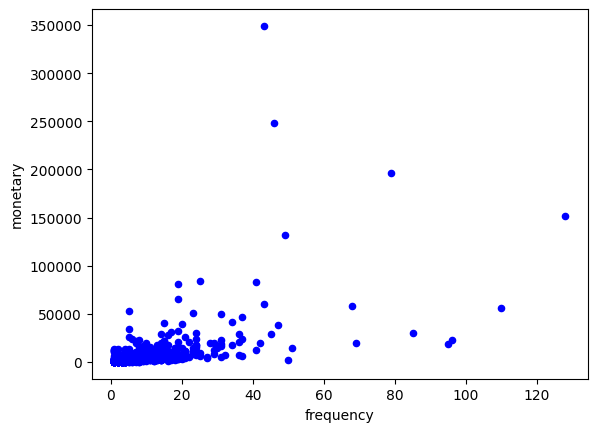

In [ ]:
## Look at data to see if need to log monetary or other skews
customer_df.plot.scatter(x="frequency", y="monetary", color="blue")
# plt.show() ## Probably, but transformation looks strange and want interpretation to be clean for client

In [112]:
## Create the kmeans df with normalization
kmeans_df=customer_df[["recency","frequency","monetary"]]
# kmeans_df.head()

## Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(kmeans_df)

## Determine k parameter via elbow method
from sklearn.cluster import KMeans
inertia = []
for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    inertia.append(km.inertia_)

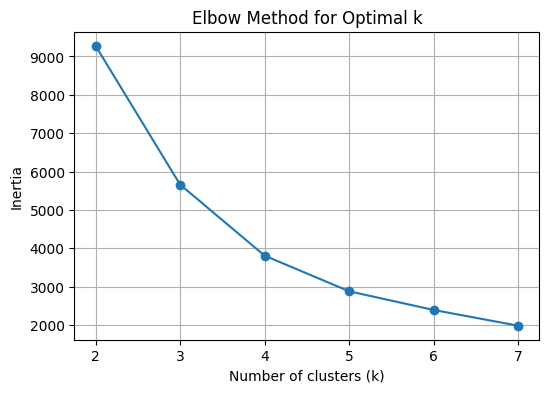

In [ ]:
## Elbow plot
ks = list(range(2, 8))
plt.figure(figsize=(6,4))
plt.plot(ks, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(ks)
plt.grid(True)
# plt.show() Chose 3 where drop off occurs

In [124]:
## Fit kmeans with 4 clusters
kmeans = KMeans(
    n_clusters=3,
    random_state=42,
    n_init=10
)

result = kmeans.fit_predict(X) ## Array of cluster assignments


In [125]:
## Determine segment names for the customer data frame
customer_df["cluster_assignment"]=result
customer_df.head()

,customer_id,recency,frequency,monetary,median_purchase_days,churn_ratio,cluster_assignment
0,12346.0,164,7,372.86,13.5,12.148148,1
1,12347.0,2,2,1323.32,37.0,0.054054,0
2,12348.0,73,1,222.16,73.0,1.000000,0
3,12349.0,42,3,2671.14,91.0,0.461538,0
4,12351.0,10,1,300.93,10.0,1.000000,0


In [126]:
## Make inferences about clusters
cluster_summary = (
    customer_df
    .groupby('cluster_assignment')
    .agg(
        avg_recency=('recency', 'mean'),
        avg_frequency=('frequency', 'mean'),
        avg_monetary=('monetary', 'mean'),
        customers=('customer_id', 'count')
    )
)
cluster_summary

,avg_recency,avg_frequency,avg_monetary,customers
cluster_assignment,,,,
0,40.831782,4.451273,2041.559205,3222
1,239.380687,1.544104,615.852799,1077
2,3.400000,66.400000,106055.070000,15


In [129]:
## Customer segment assignment
cluster_map = {
    0: 'Seasonal Buyers',
    1: 'Experimental / Hesitant Buyers',
    2: 'Consistent / Weekly, High-Value Buyers'
}

customer_df['segment'] = customer_df['cluster_assignment'].map(cluster_map)
customer_df.head()

,customer_id,recency,frequency,monetary,median_purchase_days,churn_ratio,cluster_assignment,segment
0,12346.0,164,7,372.86,13.5,12.148148,1,Experimental / Hesitant Buyers
1,12347.0,2,2,1323.32,37.0,0.054054,0,Seasonal Buyers
2,12348.0,73,1,222.16,73.0,1.000000,0,Seasonal Buyers
3,12349.0,42,3,2671.14,91.0,0.461538,0,Seasonal Buyers
4,12351.0,10,1,300.93,10.0,1.000000,0,Seasonal Buyers


In [135]:
## Visualize segmentation
import plotly.express as px

px.scatter(
    customer_df,
    x='frequency',
    y='monetary',
    color='segment',
    size='recency',
    hover_data=["customer_id"]
)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'customdata': {'bdata': ('AAAAAAAdyEAAAAAAgCHIQAAAAAAAJc' ... 'AAAMDZ0UAAAAAAQNrRQAAAAABA29FA'),
                             'dtype': 'f8',
                             'shape': '1077, 1'},
              'hovertemplate': ('segment=Experimental / Hesitan' ... '{customdata[0]}<extra></extra>'),
              'legendgroup': 'Experimental / Hesitant Buyers',
              'marker': {'color': '#636efa',
                         'size': {'bdata': ('pADKAHUBDAEHAQMBAwHFAOIANQGcAD' ... 'HYAIUAMwHiAPQAtwDhANUAmgDUACcB'),
                                  'dtype': 'i2'},
                         'sizemode': 'area',
                         'sizeref': 0.9325,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': 'Experimental / Hesitant Buyers',
              'showlegend': True,
              'type': 'scattergl',
              'x': {'bdata': ('BwEBAQECAgEBAQEBAQEBAgEBAQMCAQ' ... 'EBAQEEAgIBAQEFAQEBAQUCAwECAQEB'),
                    'dtype': 'i1'},
              'xaxis': 'x',
              'y': {'bdata': ('9ihcj8JNd0CQwvUoXIN+QAAAAAAAQG' ... 'SuR+HqbEAUrkfhehReQAAAAAAAsHpA'),
                    'dtype': 'f8'},
              'yaxis': 'y'},
             {'customdata': {'bdata': ('AAAAAIAdyEAAAAAAAB7IQAAAAACAHs' ... 'AAAADb0UAAAAAAgNvRQAAAAADA29FA'),
                             'dtype': 'f8',
                             'shape': '3222, 1'},
              'hovertemplate': ('segment=Seasonal Buyers<br>fre' ... '{customdata[0]}<extra></extra>'),
              'legendgroup': 'Seasonal Buyers',
              'marker': {'color': '#EF553B',
                         'size': {'bdata': ('AgBJACoACgAKACsADwAXAAoAPAAOAG' ... 'BFAAEAQwAbACAAJwAdABEAQgBvABEA'),
                                  'dtype': 'i2'},
                         'sizemode': 'area',
                         'sizeref': 0.9325,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': 'Seasonal Buyers',
              'showlegend': True,
              'type': 'scattergl',
              'x': {'bdata': ('AgEDAQIBAwEDBgUDAwICAgICBAEBAQ' ... 'ECCgMHAQEEBQUQAgEBAQUDAQEFAQID'),
                    'dtype': 'i1'},
              'xaxis': 'x',
              'y': {'bdata': ('4XoUrketlECF61G4HsVrQOF6FK5H3q' ... 'SuR+HafEAfhetRuEGUQFK4HoVrU6JA'),
                    'dtype': 'f8'},
              'yaxis': 'y'},
             {'customdata': {'bdata': ('AAAAAADmyEAAAAAAgJDJQAAAAAAAv8' ... 'AAAEBs0UAAAAAAQIfRQAAAAACArdFA'),
                             'dtype': 'f8',
                             'shape': '15, 1'},
              'hovertemplate': ('segment=Consistent / Weekly, H' ... '{customdata[0]}<extra></extra>'),
              'legendgroup': 'Consistent / Weekly, High-Value Buyers',
              'marker': {'color': '#00cc96',
                         'size': {'bdata': 'AAMIBgABCQACAA4CAAYA', 'dtype': 'i1'},
                         'sizemode': 'area',
                         'sizeref': 0.9325,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': 'Consistent / Weekly, High-Value Buyers',
              'showlegend': True,
              'type': 'scattergl',
              'x': {'bdata': 'YABEADEATwBFAF8ALgCAACkAbgATABkAVQArACsA', 'dtype': 'i2'},
              'xaxis': 'x',
              'y': {'bdata': ('16NwPepX1kBcj8L1AEfsQFK4HoWZCw' ... 'AAACAx3UAzMzMzs1rtQGZmZmaxTxVB'),
                    'dtype': 'f8'},
              'yaxis': 'y'}],
    'layout': {'legend': {'itemsizing': 'constant', 'title': {'text': 'segment'}, 'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'frequency'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'monetary'}}}
})